# Cours "Géomatique" - Statistiques
### Louis Maritaud
### louis.maritaud@unilim.fr

## Analyse des facteurs socio-économiques des communes françaises

 
**Objectif** : Comprendre et appliquer les méthodes statistiques de base pour l'analyse spatiale

### Compétences visées
- Calculer et interpréter des corrélations
- Réaliser des régressions linéaires simples
- Analyser les résidus d'un modèle
- Interpréter les indicateurs statistiques (R², p-value)
- Visualiser des relations entre variables

---
# Théorie

## 1. Rappels statistiques de base

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

# Configuration
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

### Création de données exemple

Nous créons un jeu de données avec une relation linéaire entre X et Y, plus un peu de bruit aléatoire.

In [301]:
# Créer des données exemple
np.random.seed(42)
n = 50
x = np.random.uniform(0, 100, n)
y = 2 * x + 10 + np.random.normal(0, 10, n)  # Relation linéaire + bruit

df = pd.DataFrame({'x': x, 'y': y})

print("Aperçu des données :")
df.head(10)

Aperçu des données :


,x,y
0,37.454012,92.292690
1,95.071431,201.856544
2,73.199394,155.242306
3,59.865848,126.720660
4,15.601864,26.418508
5,15.599452,34.000462
6,5.808361,17.010335
7,86.617615,193.806451
8,60.111501,133.659185
9,70.807258,133.984114


### Visualisation : nuage de points

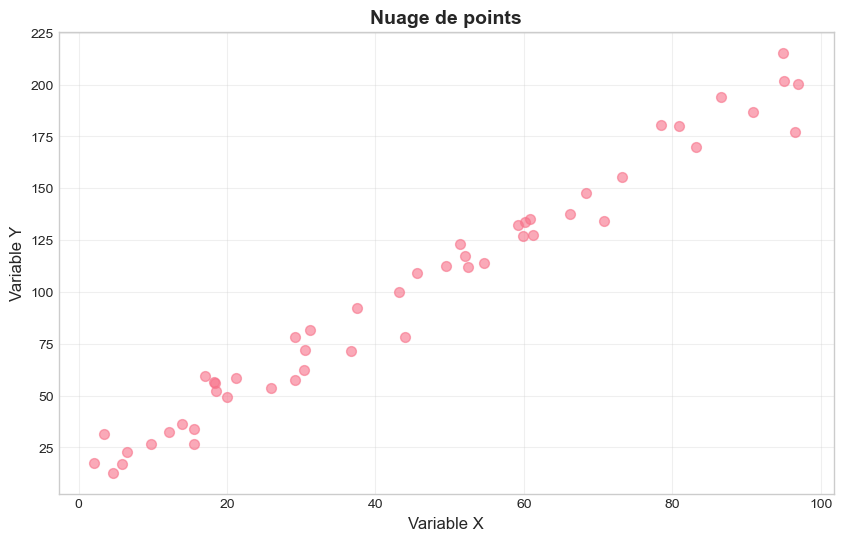

In [302]:
# Nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], alpha=0.6, s=50)
plt.xlabel('Variable X', fontsize=12)
plt.ylabel('Variable Y', fontsize=12)
plt.title('Nuage de points', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### Corrélation de Pearson

La corrélation mesure la force et la direction de la relation linéaire entre deux variables.

**Interprétation** :
- **-1** : corrélation négative parfaite
- **0** : pas de corrélation
- **+1** : corrélation positive parfaite

In [303]:
# Corrélation de Pearson
correlation = df['x'].corr(df['y'])
print(f"Corrélation de Pearson : {correlation:.3f}")

if abs(correlation) > 0.7:
    print("→ Forte corrélation")
elif abs(correlation) > 0.4:
    print("→ Corrélation modérée")
else:
    print("→ Faible corrélation")

Corrélation de Pearson : 0.987
→ Forte corrélation


---
## 2. Régression linéaire simple

La régression linéaire cherche la meilleure droite qui explique la relation entre X et Y.

**Équation** : y = ax + b
- **a** : pente (coefficient)
- **b** : ordonnée à l'origine (intercept)

### Méthode 1 : avec scipy.stats

In [304]:
# Méthode 1 : avec scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])

print("=" * 50)
print("RÉSULTATS DE LA RÉGRESSION (scipy)")
print("=" * 50)
print(f"Équation : y = {slope:.2f}x + {intercept:.2f}")
print(f"R² : {r_value**2:.3f}")  # Coefficient de détermination
print(f"p-value : {p_value:.4f}")  # Significativité
print("=" * 50)

RÉSULTATS DE LA RÉGRESSION (scipy)
Équation : y = 1.98x + 10.97
R² : 0.975
p-value : 0.0000


### Visualisation de la régression

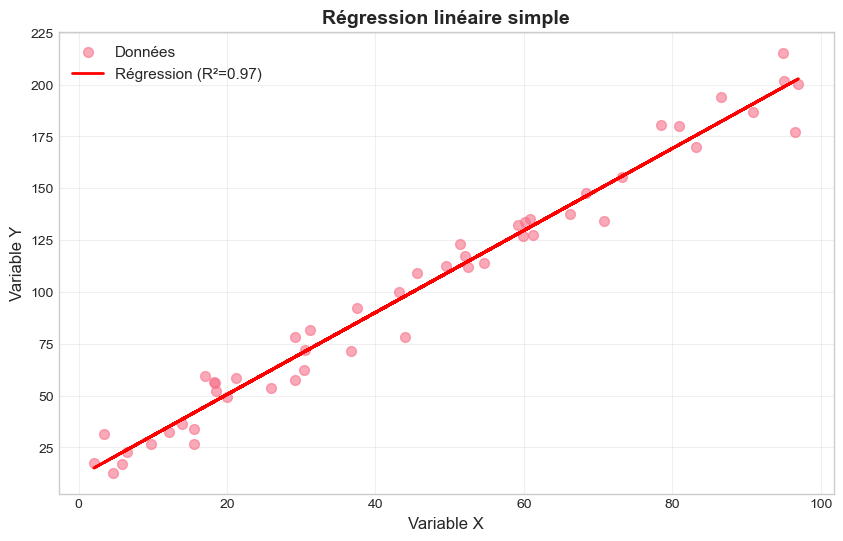

In [305]:
# Visualiser
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], alpha=0.6, label='Données', s=50)
plt.plot(df['x'], slope * df['x'] + intercept, 'r-', linewidth=2,
         label=f'Régression (R²={r_value**2:.2f})')
plt.xlabel('Variable X', fontsize=12)
plt.ylabel('Variable Y', fontsize=12)
plt.legend(fontsize=11)
plt.title('Régression linéaire simple', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### Méthode 2 : avec scikit-learn

Scikit-learn est plus flexible et s'intègre mieux dans des pipelines de machine learning.

In [306]:
# Méthode 2 : avec sklearn (plus flexible pour la suite)
model = LinearRegression()
X = df[['x']]  # Besoin d'un DataFrame 2D
y = df['y']

model.fit(X, y)
y_pred = model.predict(X)

print("=" * 50)
print("RÉSULTATS DE LA RÉGRESSION (sklearn)")
print("=" * 50)
print(f"Coefficient : {model.coef_[0]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")

# R² avec sklearn
r2 = r2_score(y, y_pred)
print(f"R² : {r2:.3f}")
print("=" * 50)

RÉSULTATS DE LA RÉGRESSION (sklearn)
Coefficient : 1.98
Intercept : 10.97
R² : 0.975


---
## 3. Interprétation des résultats

### Coefficient de détermination (R²)

**R²** mesure la part de variance expliquée par le modèle :
- **R² = 0.7** signifie que 70% de la variance de Y est expliquée par X
- Plus R² est proche de 1, meilleur est le modèle
- R² = 0 signifie que X n'explique rien de Y

### p-value

**p-value** teste la significativité statistique de la relation :
- **p < 0.05** : la relation est statistiquement significative (confiance à 95%)
- **p > 0.05** : on ne peut pas conclure qu'il y a une relation

### Résidus

**Résidu** = valeur observée - valeur prédite
- Permet d'identifier les points mal prédits
- Résidus grands = le modèle se trompe beaucoup

In [307]:
# Calculer les résidus
residus = y - y_pred

print(f"Résidu moyen : {residus.mean():.2f}")
print(f"Écart-type des résidus : {residus.std():.2f}")

Résidu moyen : 0.00
Écart-type des résidus : 9.16


### Graphique des résidus

Un bon modèle doit avoir des résidus :
- Centrés autour de 0
- Distribués aléatoirement (pas de pattern)
- Variance constante (homoscédasticité)

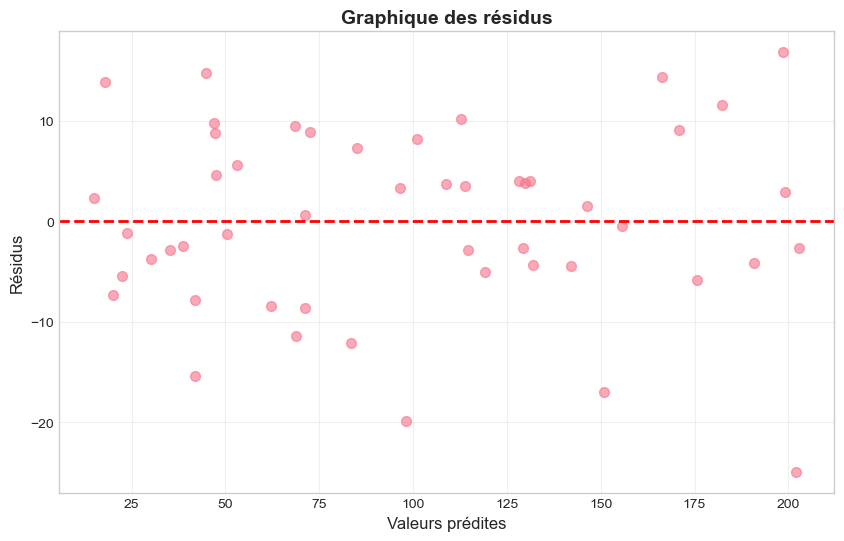

In [308]:
# Visualiser
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residus, alpha=0.6, s=50)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Valeurs prédites', fontsize=12)
plt.ylabel('Résidus', fontsize=12)
plt.title('Graphique des résidus', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

---
# Partie 2 : Exercice Pratique

## Analyse des facteurs socio-économiques des communes françaises

### Étape 1 : Créer un jeu de données

**Note** : Données qui proviennent de l'INSEE (Filosofi & recensement).  

In [309]:
import geopandas as gpd
import pandas as pd

# On veut regarder les revenus, le taux de chomage et l'occupation de logements sociaux. On a besoin de deux fichiers, FILOSOFI et le recensement de l'INSEE.

df_filo = pd.read_csv("DATA/BASE_TD_FILO_IRIS_2021_DEC.csv", sep=";")
df_recens_chomage = pd.read_csv("DATA/base-ic-activite-residents-2021.CSV", sep=";")
df_recens_logement=pd.read_csv("DATA/base-ic-logement-2021.CSV", sep=";")

df_recens_chomage['IRIS'] = df_recens_chomage['IRIS'].astype(str).str.zfill(9)
df_recens_logement['IRIS'] = df_recens_logement['IRIS'].astype(str).str.zfill(9)

df_temp=pd.merge(df_filo, df_recens_chomage, on="IRIS", how='left')
df_fin=pd.merge(df_temp, df_recens_logement, on="IRIS", how='left')


# On ne veut garder que l'IRIS, le revenu médian, la population totale, le taux de chomage et la part de logements sociaux : 
df_fin = df_fin[["IRIS", "DEC_MED21", "P21_POP1564", "P21_CHOM1564", "P21_RP_LOCHLMV", "P21_RP"]]

# On filtre que les IRIS dans le 75 : 
df_fin = df_fin[df_fin.IRIS.str.startswith("75")]
# Créer le DataFrame

communes_data = pd.DataFrame({
    'CODE_IRIS': df_fin["IRIS"],
    'revenu_median': df_fin["DEC_MED21"],
    'taux_chomage': (df_fin["P21_CHOM1564"]/df_fin["P21_POP1564"])*100,
    'population': df_fin["P21_POP1564"],
    'logements_sociaux': (df_fin["P21_RP_LOCHLMV"]/df_fin["P21_RP"])*100
})

# On enlève les valeurs manquantes : 
communes_data.dropna(inplace=True)
print("Aperçu des données :")
communes_data

C:\Users\maritp02\AppData\Local\Temp\ipykernel_6040\3845065847.py:7: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_recens_chomage = pd.read_csv("DATA/base-ic-activite-residents-2021.CSV", sep=";")
C:\Users\maritp02\AppData\Local\Temp\ipykernel_6040\3845065847.py:8: DtypeWarning: Columns (0,1,3,80,81,82,83,84,85,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  df_recens_logement=pd.read_csv("DATA/base-ic-logement-2021.CSV", sep=";")


Aperçu des données :


,CODE_IRIS,revenu_median,taux_chomage,population,logements_sociaux
9762,751010101,ns,4.400388,771.956830,11.697934
9763,751010102,ns,15.658490,102.417493,0.000000
9764,751010103,ns,4.563872,164.129656,4.579703
9768,751010201,33800,9.175863,1631.161911,15.030730
9769,751010202,43760,7.372575,1301.457997,1.565134
...,...,...,...,...,...
10749,751208022,20830,10.921232,916.252896,55.449480
10750,751208023,22800,8.155896,1452.427010,53.384897
10751,751208024,28040,7.885814,1871.364945,17.953760
10752,751208025,25080,10.438651,1924.953898,41.174872


In [310]:
# On supprime les "ns" et les "nd"
for i in communes_data.columns.to_list():
    communes_data.drop(communes_data[communes_data[i] == 'ns'].index, inplace=True)
    communes_data.drop(communes_data[communes_data[i] == 'nd'].index, inplace=True)
communes_data["revenu_median"]=communes_data.revenu_median.astype(int)
communes_data["taux_chomage"]=communes_data.taux_chomage.astype(float)
communes_data["logements_sociaux"]=communes_data.logements_sociaux.astype(float)
communes_data["population"]=communes_data.population.astype(int)

display(communes_data)
# Statistiques descriptives
print("\nStatistiques descriptives :")
communes_data.describe()

,CODE_IRIS,revenu_median,taux_chomage,population,logements_sociaux
9768,751010201,33800,9.175863,1631,15.030730
9769,751010202,43760,7.372575,1301,1.565134
9770,751010203,36250,6.914085,1728,12.851699
9771,751010204,33340,9.222014,1484,15.612219
9774,751010301,43160,7.116184,1841,5.092748
...,...,...,...,...,...
10749,751208022,20830,10.921232,916,55.449480
10750,751208023,22800,8.155896,1452,53.384897
10751,751208024,28040,7.885814,1871,17.953760
10752,751208025,25080,10.438651,1924,41.174872



Statistiques descriptives :


,revenu_median,taux_chomage,population,logements_sociaux
count,864.000000,864.000000,864.000000,864.000000
mean,35070.960648,8.320914,1676.074074,18.112898
std,11853.015609,2.509958,521.001915,23.360498
min,12460.000000,2.919974,567.000000,0.000000
25%,26340.000000,6.494040,1337.000000,1.222054
50%,34600.000000,7.943647,1604.000000,8.331525
75%,42142.500000,9.690173,1905.750000,23.878006
max,77180.000000,19.038174,6053.000000,96.040113


---
### Étape 2 : Matrice de corrélation

La matrice de corrélation permet de visualiser toutes les corrélations entre variables d'un coup d'œil.

In [311]:
# Calculer la matrice de corrélation
variables = ['revenu_median', 'taux_chomage', 'population', 'logements_sociaux']
correlation_matrix = communes_data[variables].corr()

print("Matrice de corrélation :")
print(correlation_matrix)

Matrice de corrélation :
                   revenu_median  taux_chomage  population  logements_sociaux
revenu_median           1.000000     -0.701164   -0.267734          -0.711144
taux_chomage           -0.701164      1.000000    0.151998           0.673864
population             -0.267734      0.151998    1.000000           0.143009
logements_sociaux      -0.711144      0.673864    0.143009           1.000000


### Visualisation avec une heatmap

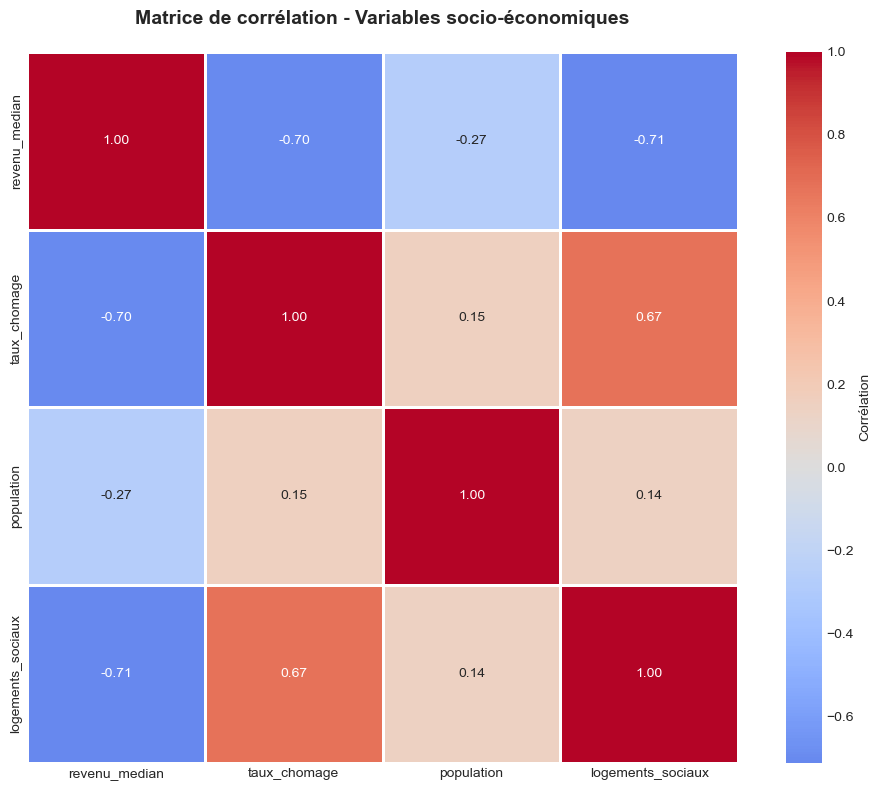

In [312]:
# Visualiser avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Afficher les valeurs
            cmap='coolwarm',  # Palette de couleurs
            center=0,  # Centrer sur 0
            square=True,
            linewidths=1,
            fmt='.2f',
            cbar_kws={'label': 'Corrélation'})
plt.title('Matrice de corrélation - Variables socio-économiques', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Interprétation

In [313]:
# Interprétation
print("\nInterprétations :")
corr_revenu_chomage = correlation_matrix.loc['revenu_median', 'taux_chomage']
print(f"Corrélation revenu-chômage : {corr_revenu_chomage:.3f}")

if corr_revenu_chomage < -0.5:
    print("→ Forte corrélation négative : plus le revenu est élevé, plus le chômage est faible")
elif corr_revenu_chomage < -0.3:
    print("→ Corrélation négative modérée entre revenu et chômage")
else:
    print("→ Faible corrélation entre revenu et chômage")


Interprétations :
Corrélation revenu-chômage : -0.701
→ Forte corrélation négative : plus le revenu est élevé, plus le chômage est faible


---
### Étape 3 : Régression simple

**Question** : Le revenu médian prédit-il le taux de chômage ?

#### Nuage de points

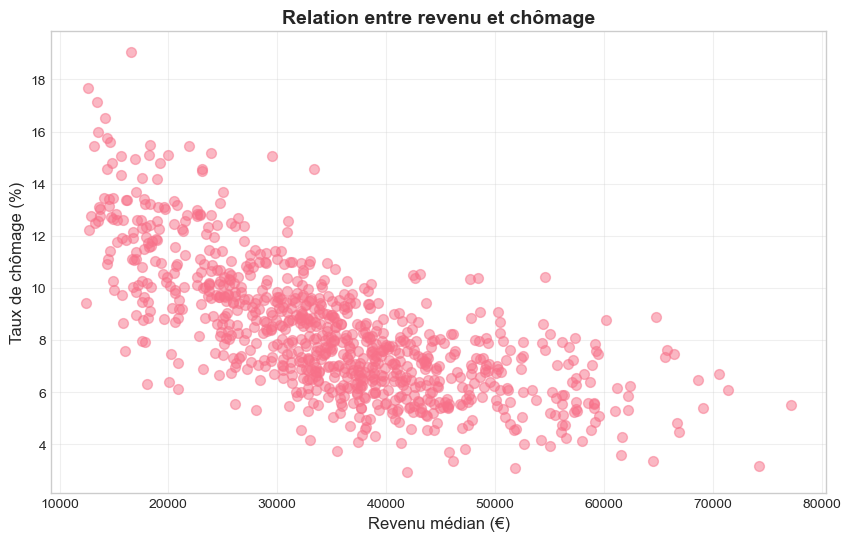

In [314]:
# Nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(communes_data['revenu_median'], 
            communes_data['taux_chomage'],
            alpha=0.5, s=50)
plt.xlabel('Revenu médian (€)', fontsize=12)
plt.ylabel('Taux de chômage (%)', fontsize=12)
plt.title('Relation entre revenu et chômage', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Régression linéaire

In [315]:
# Régression linéaire
X = communes_data[['revenu_median']]
y = communes_data['taux_chomage']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Résultats
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print("=" * 70)
print("RÉSULTATS DE LA RÉGRESSION")
print("=" * 70)
print(f"Équation : taux_chomage = {slope:.4f} * revenu + {intercept:.2f}")
print(f"R² = {r2:.3f}")
print(f"→ {r2*100:.1f}% de la variance du chômage est expliquée par le revenu")
print("=" * 70)

RÉSULTATS DE LA RÉGRESSION
Équation : taux_chomage = -0.0001 * revenu + 13.53
R² = 0.492
→ 49.2% de la variance du chômage est expliquée par le revenu


#### Visualisation de la régression

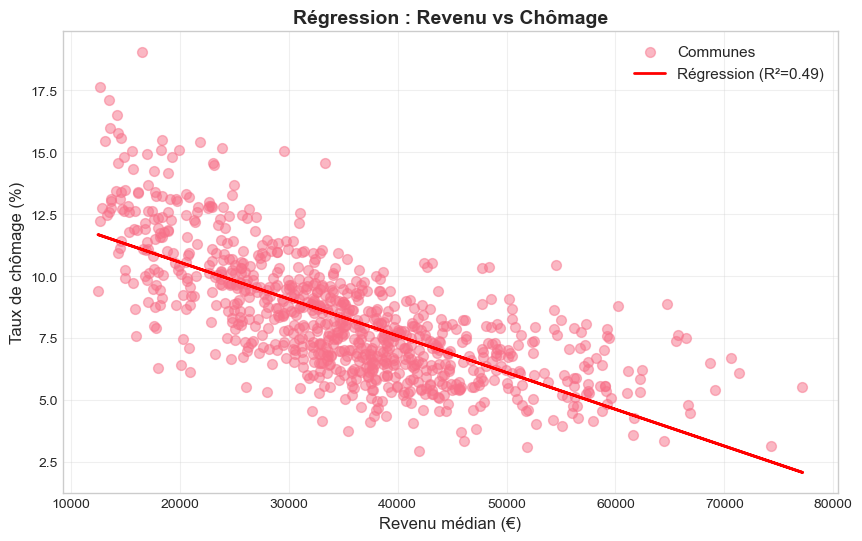

In [316]:
# Visualiser la régression
plt.figure(figsize=(10, 6))
plt.scatter(communes_data['revenu_median'], 
            communes_data['taux_chomage'],
            alpha=0.5, label='Communes', s=50)
plt.plot(communes_data['revenu_median'], 
         y_pred, 
         'r-', linewidth=2, label=f'Régression (R²={r2:.2f})')
plt.xlabel('Revenu médian (€)', fontsize=12)
plt.ylabel('Taux de chômage (%)', fontsize=12)
plt.title('Régression : Revenu vs Chômage', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

#### Test de significativité

In [317]:
# Test de significativité
_, _, _, p_value, _ = stats.linregress(communes_data['revenu_median'], 
                                        communes_data['taux_chomage'])
print(f"p-value = {p_value:.6f}")
if p_value < 0.05:
    print("→ La relation est statistiquement significative (p < 0.05)")
    print("   Nous pouvons affirmer avec confiance qu'il existe une relation entre revenu et chômage.")
else:
    print("→ La relation n'est pas statistiquement significative (p > 0.05)")

p-value = 0.000000
→ La relation est statistiquement significative (p < 0.05)
   Nous pouvons affirmer avec confiance qu'il existe une relation entre revenu et chômage.


---
### Étape 4 : Analyse des résidus

In [318]:
# Calculer les résidus
communes_data['taux_chomage_predit'] = y_pred
communes_data['residu'] = communes_data['taux_chomage'] - communes_data['taux_chomage_predit']

print("Communes avec les plus grands résidus (prédiction imprécise) :")
print(communes_data[['CODE_IRIS', 'revenu_median', 'taux_chomage', 
                      'taux_chomage_predit', 'residu']].nlargest(10, 'residu'))

Communes avec les plus grands résidus (prédiction imprécise) :
       CODE_IRIS  revenu_median  taux_chomage  taux_chomage_predit    residu
10720  751207910          16550     19.038174            11.070837  7.967338
10557  751186927          12650     17.660701            11.649894  6.010807
9812   751041303          33360     14.580733             8.574951  6.005782
10694  751207714          29530     15.069212             9.143615  5.925597
10556  751186926          13460     17.134180            11.529628  5.604552
10191  751135029          23900     15.187793             9.979536  5.208257
10016  751104001          21850     15.438733            10.283912  5.154820
10650  751197512          14200     16.528925            11.419756  5.109169
10485  751176604          54550     10.432346             5.428739  5.003607
10424  751166209          64760      8.866983             3.912796  4.954186


#### Graphique des résidus

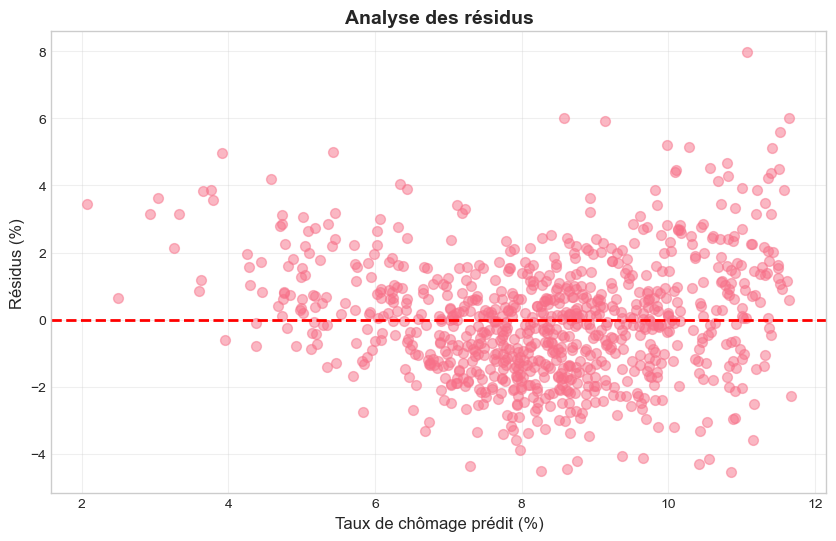

In [319]:
# Graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, communes_data['residu'], alpha=0.5, s=50)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Taux de chômage prédit (%)', fontsize=12)
plt.ylabel('Résidus (%)', fontsize=12)
plt.title('Analyse des résidus', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

#### Distribution des résidus

Les résidus doivent idéalement suivre une distribution normale.

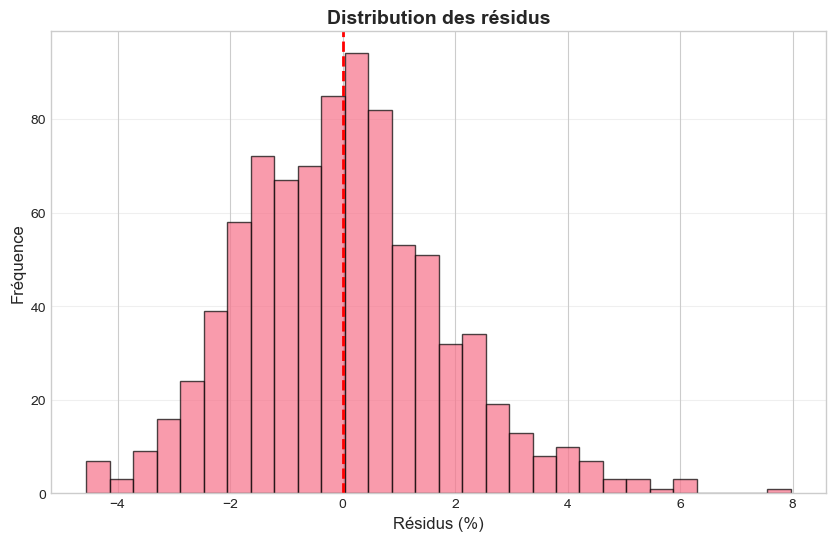

Moyenne des résidus : -0.0000
Écart-type des résidus : 1.79


In [320]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
plt.hist(communes_data['residu'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Résidus (%)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Distribution des résidus', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

print(f"Moyenne des résidus : {communes_data['residu'].mean():.4f}")
print(f"Écart-type des résidus : {communes_data['residu'].std():.2f}")

---
## Exercices bonus

À vous de jouer !

### 1. Régression avec une autre variable
Testez la relation entre `logements_sociaux` et `taux_chomage`.

In [321]:
# Régression linéaire
X = communes_data[['logements_sociaux']]
y = communes_data['taux_chomage']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Résultats
slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print("=" * 70)
print("RÉSULTATS DE LA RÉGRESSION")
print("=" * 70)
print(f"Équation : taux_chomage = {slope:.4f} * revenu + {intercept:.2f}")
print(f"R² = {r2:.3f}")
print(f"→ {r2*100:.1f}% de la variance du chômage est expliquée par le revenu")
print("=" * 70)

RÉSULTATS DE LA RÉGRESSION
Équation : taux_chomage = 0.0724 * revenu + 7.01
R² = 0.454
→ 45.4% de la variance du chômage est expliquée par le revenu


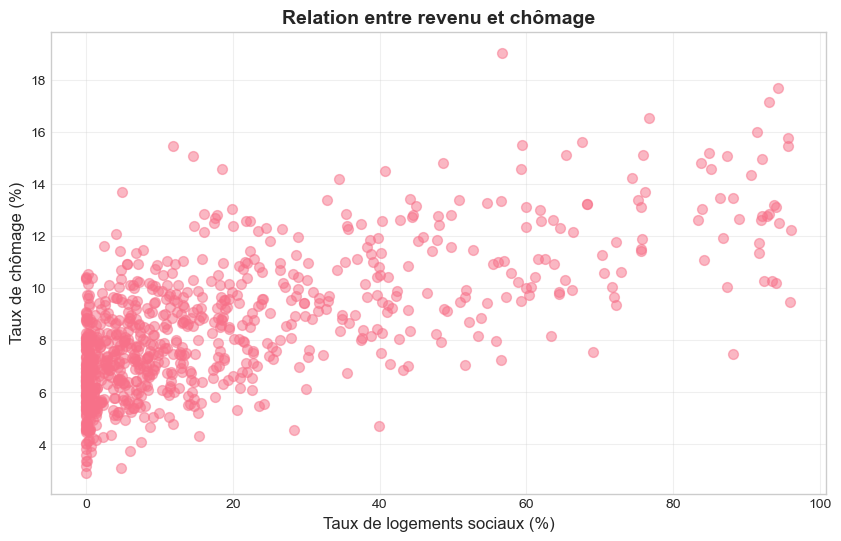

In [322]:
# Votre code ici
# Nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(communes_data['logements_sociaux'], 
            communes_data['taux_chomage'],
            alpha=0.5, s=50)
plt.xlabel('Taux de logements sociaux (%)', fontsize=12)
plt.ylabel('Taux de chômage (%)', fontsize=12)
plt.title('Relation entre revenu et chômage', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

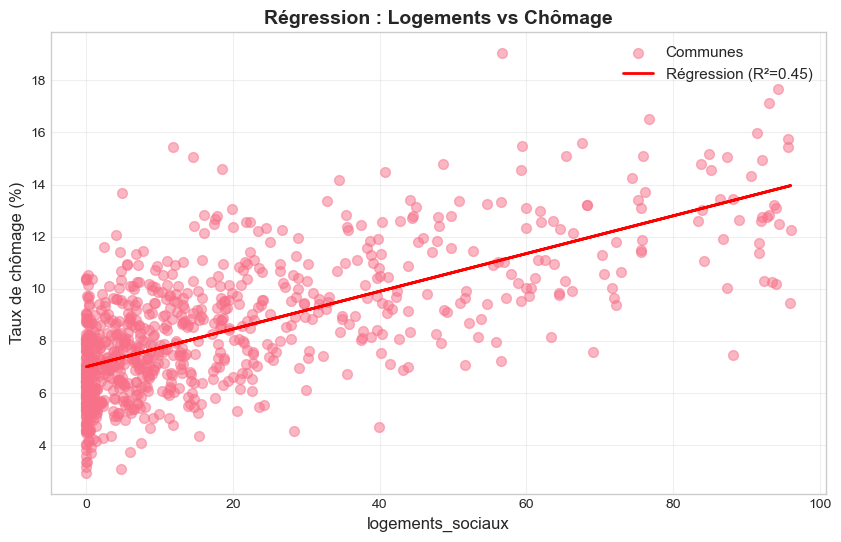

In [323]:
# Visualiser la régression
plt.figure(figsize=(10, 6))
plt.scatter(communes_data["logements_sociaux"], 
            communes_data['taux_chomage'],
            alpha=0.5, label='Communes', s=50)
plt.plot(communes_data["logements_sociaux"], 
         y_pred, 
         'r-', linewidth=2, label=f'Régression (R²={r2:.2f})')
plt.xlabel("logements_sociaux", fontsize=12)
plt.ylabel('Taux de chômage (%)', fontsize=12)
plt.title('Régression : Logements vs Chômage', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

In [324]:
# Test de significativité
_, _, _, p_value, _ = stats.linregress(communes_data['logements_sociaux'], 
                                        communes_data['taux_chomage'])
print(f"p-value = {p_value:.6f}")

p-value = 0.000000


### 2. Identifier les communes atypiques
Trouvez les communes dont le résidu absolu est supérieur à 2 écarts-types.

In [325]:
# Votre code ici


### 3. Régression multiple
Créez un modèle qui utilise à la fois `revenu_median` ET `logements_sociaux` pour prédire le chômage.  
**Indice** : utilisez `X = communes_data[['revenu_median', 'logements_sociaux']]`

In [326]:
# Votre code ici


# Plot de cartes de régressions

In [327]:
# On va chercher les données shapefile des IRIS de France
iris=gpd.read_file("DATA/CONTOURS-IRIS.shp")
display(iris)

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,72191,Mayet,0000,721910000,Mayet,Z,"POLYGON ((498083.5 6747517.4, 498128 6747467.1..."
1,77248,Lesches,0000,772480000,Lesches,Z,"POLYGON ((685753.1 6868612.9, 685757.7 6868592..."
2,51426,Péas,0000,514260000,Péas,Z,"POLYGON ((759067.2 6849592.7, 758778.6 6849650..."
3,81199,Padiès,0000,811990000,Padiès,Z,"POLYGON ((651482.8 6326359.4, 651475.6 6326359..."
4,59225,Feignies,0102,592250102,Sud,H,"POLYGON ((767673.5 7022290.5, 767647.2 7022275..."
...,...,...,...,...,...,...,...
48584,71073,Chagny,0102,710730102,Périphérie,H,"POLYGON ((831995.4 6646411.8, 831977.7 6646440..."
48585,38545,Vif,0101,385450101,Centre Ville,H,"POLYGON ((912429.5 6439712.7, 912342.6 6439488..."
48586,74063,Châtel,0000,740630000,Châtel,Z,"POLYGON ((991081.9 6580596.8, 991205.6 6580634..."
48587,95101,Bray-et-Lû,0000,951010000,Bray-et-Lû,Z,"POLYGON ((603615.5 6895980.9, 603612.3 6895974..."


In [328]:
# On opère une jointure sur les codes IRIS
df_iris = pd.merge(communes_data, iris, on= "CODE_IRIS")
gdf_iris = gpd.GeoDataFrame(df_iris, geometry="geometry")
display(gdf_iris)

,CODE_IRIS,revenu_median,taux_chomage,population,logements_sociaux,taux_chomage_predit,residu,INSEE_COM,NOM_COM,IRIS,NOM_IRIS,TYP_IRIS,geometry
0,751010201,33800,9.175863,1631,15.030730,8.509621,0.666242,75101,Paris 1er Arrondissement,0201,Les Halles 1,H,"POLYGON ((652324.6 6862635.3, 652293.6 6862554..."
1,751010202,43760,7.372575,1301,1.565134,7.030798,0.341778,75101,Paris 1er Arrondissement,0202,Les Halles 2,H,"POLYGON ((651869 6862406.1, 651868.2 6862406.5..."
2,751010203,36250,6.914085,1728,12.851699,8.145854,-1.231770,75101,Paris 1er Arrondissement,0203,Les Halles 3,H,"POLYGON ((651811.4 6862809.8, 651809.6 6862806..."
3,751010204,33340,9.222014,1484,15.612219,8.577920,0.644094,75101,Paris 1er Arrondissement,0204,Les Halles 4,H,"POLYGON ((652198.8 6862680.2, 652196.8 6862680..."
4,751010301,43160,7.116184,1841,5.092748,7.119883,-0.003699,75101,Paris 1er Arrondissement,0301,Palais Royal 1,H,"POLYGON ((651280.9 6863199.3, 651318.5 6863186..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,751208022,20830,10.921232,916,55.449480,10.435358,0.485874,75120,Paris 20e Arrondissement,8022,Charonne 22,H,"POLYGON ((656445.6 6862643.6, 656469.4 6862680..."
860,751208023,22800,8.155896,1452,53.384897,10.142860,-1.986964,75120,Paris 20e Arrondissement,8023,Charonne 23,H,"POLYGON ((656264.7 6862118.8, 656223.9 6862173..."
861,751208024,28040,7.885814,1871,17.953760,9.364844,-1.479030,75120,Paris 20e Arrondissement,8024,Charonne 24,H,"POLYGON ((656264.7 6862118.8, 656171.9 6862032..."
862,751208025,25080,10.438651,1924,41.174872,9.804334,0.634317,75120,Paris 20e Arrondissement,8025,Charonne 25,H,"POLYGON ((655877.3 6861839.9, 655832.6 6861888..."


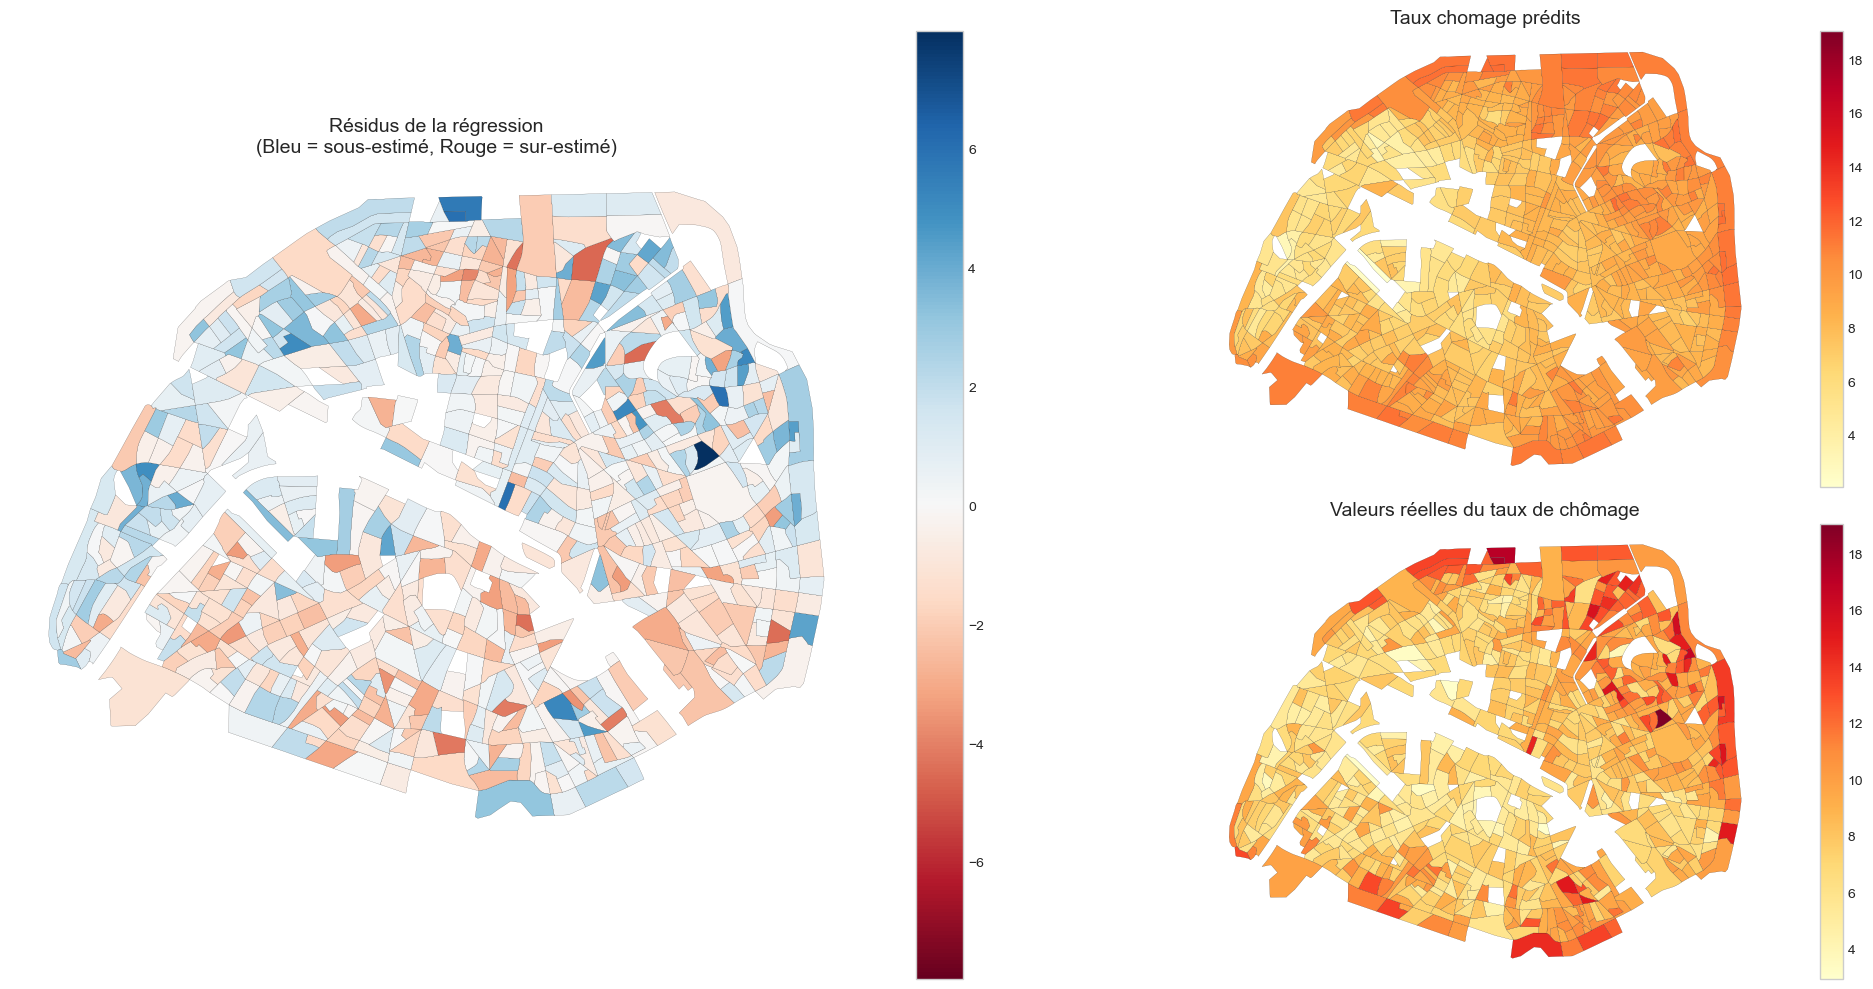

p-value = 0.000000


In [329]:
vmax=gdf_iris['taux_chomage'].max()
fig, axes = plt.subplot_mosaic([['residus', 'predites'],
                               ['residus', 'reelles']],
                              figsize=(20,10))

# Carte des résidus
gdf_iris.plot(column='residu', 
                ax=axes["residus"],
                cmap='RdBu',
                legend=True,
                edgecolor='black',
                linewidth=0.1,
                vmin=-gdf_iris['residu'].abs().max(),
                vmax=gdf_iris['residu'].abs().max())
axes["residus"].set_title('Résidus de la régression\n(Bleu = sous-estimé, Rouge = sur-estimé)', fontsize=14)
axes["residus"].axis('off')

# Carte des valeurs prédites
gdf_iris.plot(column='taux_chomage_predit',
                ax=axes["predites"],
                cmap='YlOrRd',
                legend=True,
                edgecolor='black',
                linewidth=0.1,
                 vmax=vmax)
axes["predites"].set_title('Taux chomage prédits', fontsize=14)
axes["predites"].axis('off')

# Carte des valeurs réelle
gdf_iris.plot(column='taux_chomage', 
                ax=axes["reelles"],
                cmap='YlOrRd',
                legend=True,
                edgecolor='black',
                linewidth=0.1,)
axes["reelles"].set_title('Valeurs réelles du taux de chômage', fontsize=14)
axes["reelles"].axis('off')


plt.axis('off')  # Masquer les axes
plt.tight_layout()
plt.show()

# Test de significativité
_, _, _, p_value, _ = stats.linregress(gdf_iris['logements_sociaux'], 
                                        gdf_iris['taux_chomage'])
print(f"p-value = {p_value:6f}")

---
## Conclusion

Dans ce cours, vous avez appris à :
- Calculer et interpréter des corrélations
- Réaliser des régressions linéaires simples
- Interpréter le R² et la p-value
- Analyser les résidus d'un modèle
- Utiliser des heatmaps pour visualiser les corrélations

### Concepts clés à retenir

| Indicateur | Signification | Interprétation |
|-----------|---------------|----------------|
| **Corrélation** | Force de la relation linéaire | -1 à +1 |
| **R²** | % de variance expliquée | 0 à 1 (plus c'est proche de 1, mieux c'est) |
| **p-value** | Significativité statistique | < 0.05 = significatif |
| **Résidus** | Erreurs de prédiction | Doivent être centrés sur 0 et aléatoires |

### Pour aller plus loin
- Régression multiple (plusieurs variables explicatives)
- Tests d'hypothèses plus avancés
- Autocorrélation spatiale (Moran's I)
- Modèles géographiquement pondérés (GWR)